In [57]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [58]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format
# tf.keras.backend.set_floatx('float32')

print("Ran the import statements.")

Ran the import statements.


In [59]:
tf.__version__

'2.2.0'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [60]:
!ls "/content/gdrive/My Drive/classification-regression/"

datasets_11167_15520_test.csv  datasets_11167_15520_train.csv


In [61]:
PATH = "/content/gdrive/My Drive/classification-regression/"

In [62]:
os.listdir(PATH)

['datasets_11167_15520_train.csv', 'datasets_11167_15520_test.csv']

In [63]:
train_dir = os.path.join(PATH,'datasets_11167_15520_train.csv')
test_dir = os.path.join(PATH,'datasets_11167_15520_test.csv')

In [64]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df = train_df.reindex(np.random.permutation(train_df.index)) # shuffle the training set

In [65]:
train_df.head(20) 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
794,967,1,1.6,0,4,0,25,0.6,92,8,9,243,1642,3076,7,4,18,0,1,1,2
19,682,1,0.5,0,4,0,19,1.0,121,4,11,902,1064,2337,11,1,18,0,1,1,1
1459,1927,0,0.9,1,3,0,11,0.4,190,8,12,491,1506,2916,16,11,18,0,1,1,3
1276,586,0,1.4,1,10,1,8,0.5,142,8,14,116,598,3178,9,7,10,1,0,1,2
1233,1164,1,2.6,1,0,0,61,0.3,88,1,6,1107,1656,3859,11,10,17,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1735,1,1.9,1,0,1,59,0.7,148,6,0,137,846,3230,6,1,9,1,1,0,3
432,1421,0,2.8,0,0,1,57,0.4,165,1,2,781,1657,2775,13,8,14,1,0,1,3
1371,601,1,1.7,1,3,1,6,0.8,169,4,11,818,1827,2651,14,8,9,1,0,1,2
433,1464,0,0.5,1,0,1,17,0.7,153,6,8,418,1341,1277,13,6,19,1,0,0,1


In [66]:
print(train_df.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
                ..
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
Length: 21, dtype: int64


In [67]:
# Calculate the Z-scores of each column in the training set and
# write those Z-scores into a new pandas DataFrame named train_df_norm.
train_df_mean = train_df.mean()
train_df_std = train_df.std()
train_df_norm = (train_df - train_df_mean)/train_df_std
train_df_norm['blue'] = train_df['blue']
train_df_norm['dual_sim'] = train_df['dual_sim']
train_df_norm['four_g'] = train_df['four_g']
train_df_norm['three_g'] = train_df['three_g']
train_df_norm['touch_screen'] = train_df['touch_screen']
train_df_norm['wifi'] = train_df['wifi']
train_df_norm['price_range'] = train_df['price_range']

In [68]:
train_df_norm.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
794,-0.6,1,0.1,0,-0.1,0,-0.4,0.3,-1.4,1.5,-0.2,-0.9,0.9,0.9,-1.3,-0.4,1.3,0,1,1,2
19,-1.3,1,-1.3,0,-0.1,0,-0.7,1.7,-0.5,-0.2,0.2,0.6,-0.4,0.2,-0.3,-1.1,1.3,0,1,1,1
1459,1.6,0,-0.8,1,-0.3,0,-1.2,-0.4,1.4,1.5,0.3,-0.3,0.6,0.7,0.9,1.2,1.3,0,1,1,3
1276,-1.5,0,-0.1,1,1.3,1,-1.3,-0.0,0.0,1.5,0.7,-1.2,-1.5,1.0,-0.8,0.3,-0.2,1,0,1,2
1233,-0.2,1,1.3,1,-1.0,0,1.6,-0.7,-1.5,-1.5,-0.6,1.0,0.9,1.6,-0.3,1.0,1.1,0,1,0,3


In [69]:
train_df_norm.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,0.0,0.5,-0.0,0.5,0.0,0.5,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.8,0.5,0.5,1.5
std,1.0,0.5,1.0,0.5,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.5,0.5,1.1
min,-1.7,0.0,-1.3,0.0,-1.0,0.0,-1.7,-1.4,-1.7,-1.5,-1.6,-1.5,-1.7,-1.7,-1.7,-1.3,-1.6,0.0,0.0,0.0,0.0
25%,-0.9,0.0,-1.0,0.0,-0.8,0.0,-0.9,-1.0,-0.9,-0.7,-0.8,-0.8,-0.9,-0.8,-0.8,-0.9,-0.9,1.0,0.0,0.0,0.8
50%,-0.0,0.0,-0.0,1.0,-0.3,1.0,-0.0,-0.0,0.0,-0.2,0.0,-0.2,-0.0,0.0,-0.1,-0.2,-0.0,1.0,1.0,1.0,1.5
75%,0.9,1.0,0.8,1.0,0.6,1.0,0.9,1.0,0.8,1.1,0.8,0.7,0.9,0.9,0.9,0.7,0.9,1.0,1.0,1.0,2.2
max,1.7,1.0,1.8,1.0,3.4,1.0,1.8,1.7,1.7,1.5,1.7,3.0,1.7,1.7,1.6,2.8,1.6,1.0,1.0,1.0,3.0


In [70]:
train_df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 794 to 648
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   int64  
 18  touch_s

In [71]:
train_df_norm_correlation = train_df

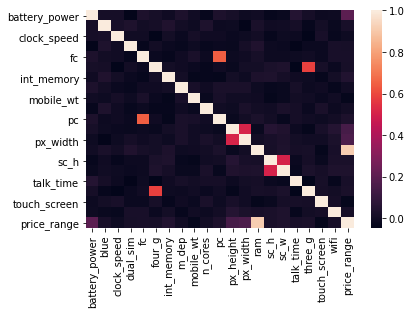

In [72]:
import seaborn as sns
corr = train_df.corr()
sns.heatmap(corr)

In [73]:
print (corr['price_range'].sort_values(ascending=False), '\n')

price_range      1.0
ram              0.9
battery_power    0.2
px_width         0.2
px_height        0.1
                ... 
n_cores          0.0
m_dep            0.0
clock_speed     -0.0
mobile_wt       -0.0
touch_screen    -0.0
Name: price_range, Length: 21, dtype: float64 



In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [75]:
# Divide data into features X and target (Classes) Y
X = train_df_norm.iloc[:,:-1]
Y = train_df_norm.iloc[:,-1]
#Y = pd.get_dummies(Y)
print(X.shape)
print(Y.shape)
Y_one = train_df_norm.iloc[:,-1]

(2000, 20)
(2000,)


In [76]:
enc = OneHotEncoder()
Y = enc.fit_transform(Y[:, np.newaxis]).toarray()

In [24]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2)

In [78]:
X_train_categorical = X_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]
X_test_categorical = X_test[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']]
Y_train_decode = np.argmax(Y_train, axis=1)

In [79]:
#Chi Square
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_categorical, Y_train)
X_train_fs = fs.transform(X_train_categorical)
X_test_fs = fs.transform(X_test_categorical)

In [80]:
#Mutual Info Classification
fs2 = SelectKBest(score_func=mutual_info_classif, k='all')
fs2.fit(X_train_categorical, Y_train_decode)
X_train_fs2 = fs2.transform(X_train_categorical)
X_test_fs2 = fs2.transform(X_test_categorical)

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.014591
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.051507


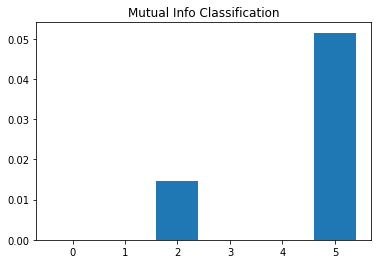

In [89]:
#Mutual Info Classification
for i in range(len(fs2.scores_)):
	print('Feature %d: %f' % (i, fs2.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs2.scores_))], fs2.scores_)
plt.title('Mutual Info Classification')
plt.show()

In [82]:
X_train_categorical.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
1143,1,1,1,1,0,0
1009,0,0,0,1,0,0
1552,1,0,0,0,0,0
1793,1,1,0,1,0,1
120,1,1,0,0,1,0


Feature 0: 0.441917
Feature 1: 1.231882
Feature 2: 0.492471
Feature 3: 0.445237
Feature 4: 0.814077
Feature 5: 0.238558


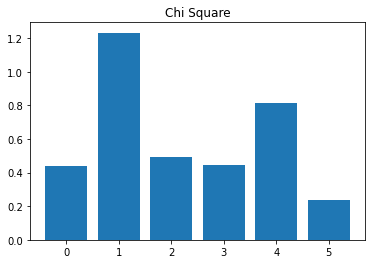

In [90]:
#Chi Square
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('Chi Square')
plt.show()

In [84]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_classes)

4


In [85]:
#Model Using Feature Selection Chi Square 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim = 17, activation = 'relu'))
#model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 132       
Total params: 708
Trainable params: 708
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [91]:
#Dataset after Feature Selection
X_train_chi = X_train.drop(['blue', 'three_g', 'wifi'], axis=1)
X_test_chi = X_test.drop(['blue', 'three_g', 'wifi'], axis=1)
X_train_mutual = X_train.drop(['blue', 'dual_sim', 'three_g', 'touch_screen'], axis=1)
X_test_mutual = X_test.drop(['blue', 'dual_sim', 'three_g', 'touch_screen'], axis=1)

X_train_chi.head()

,battery_power,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen
1143,-0.8,-0.4,1,1.3,1,-0.1,1.0,-0.8,-0.7,0.2,0.0,-0.5,0.6,0.2,-0.6,1.5,0
1009,1.5,0.8,0,-0.1,0,1.0,-0.7,0.5,0.2,-0.5,-0.4,0.7,-0.8,-0.1,-1.3,0.5,0
1552,0.7,-1.0,0,-1.0,0,1.3,-1.4,-0.0,1.5,-1.5,0.9,1.2,-0.0,0.6,-0.6,-1.5,0
1793,0.1,1.6,1,-1.0,0,1.8,-0.0,-1.6,0.6,-0.6,-1.4,-0.8,-0.2,1.6,0.5,-1.1,0
120,1.1,0.1,1,-0.3,0,-1.2,-0.7,1.5,1.5,-0.5,-0.2,0.2,0.4,-0.1,0.7,-0.9,1


In [92]:
#training using Chi Square
history = model.fit(X_train_chi, Y_train,
                                 batch_size=5,
                                 epochs=10,
                                 verbose=1,
                                 validation_data=(X_test_chi, Y_test)
)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 1.2351 - accuracy: 0.4300 - val_loss: 1.0081 - val_accuracy: 0.5675
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.8454 - accuracy: 0.6819 - val_loss: 0.6913 - val_accuracy: 0.7375
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.8044 - val_loss: 0.5224 - val_accuracy: 0.8375
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.8700 - val_loss: 0.4233 - val_accuracy: 0.8575
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.9038 - val_loss: 0.3580 - val_accuracy: 0.9225
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3189 - accuracy: 0.9206 - val_loss: 0.3157 - val_accuracy: 0.9175
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2741 - accuracy: 0.9394 - val_loss: 0.2790 - val_accuracy: 0.9225
Epoch 

In [93]:
#Model Using Feature Selection Mutual Info Classification
model_mic = tf.keras.models.Sequential()
model_mic.add(tf.keras.layers.Dense(32, input_dim = 16, activation = 'relu'))
#model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model_mic.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [94]:
model_mic.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [95]:
history_mutual = model_mic.fit(X_train_mutual, Y_train,
                                 batch_size=5,
                                 epochs=10,
                                 verbose=1,
                                 validation_data=(X_test_mutual, Y_test)
)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 1.2957 - accuracy: 0.3862 - val_loss: 1.0354 - val_accuracy: 0.5750
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.8860 - accuracy: 0.6400 - val_loss: 0.7252 - val_accuracy: 0.7175
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.6531 - accuracy: 0.7669 - val_loss: 0.5557 - val_accuracy: 0.8200
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.5080 - accuracy: 0.8500 - val_loss: 0.4679 - val_accuracy: 0.8500
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.9000 - val_loss: 0.3861 - val_accuracy: 0.8750
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.9250 - val_loss: 0.3406 - val_accuracy: 0.8900
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3004 - accuracy: 0.9331 - val_loss: 0.3010 - val_accuracy: 0.8925
Epoch 

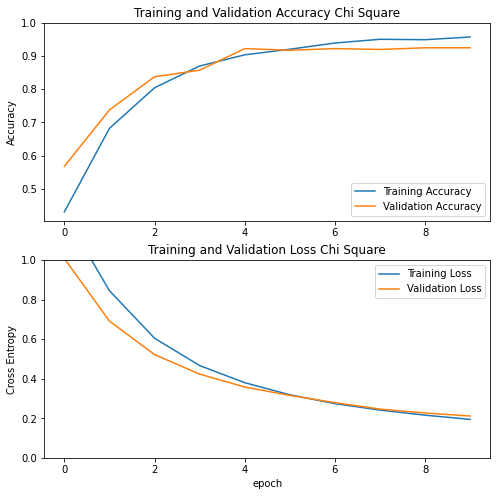

In [96]:
#Chi Square
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Chi Square')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss Chi Square')
plt.xlabel('epoch')
plt.show()

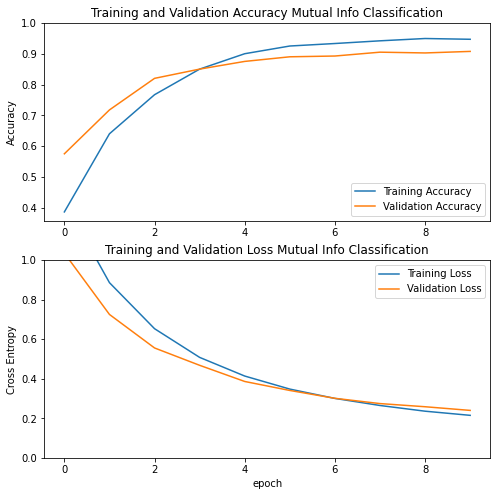

In [97]:
#Mutual Info Classification
acc = history_mutual.history['accuracy']
val_acc = history_mutual.history['val_accuracy']

loss = history_mutual.history['loss']
val_loss = history_mutual.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Mutual Info Classification')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss Mutual Info Classification')
plt.xlabel('epoch')
plt.show()

In [98]:
#Model Using All Features
model_all = tf.keras.models.Sequential()
model_all.add(tf.keras.layers.Dense(32, input_dim = 20, activation = 'relu'))
#model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model_all.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

In [99]:
model_all.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])

In [100]:
history_all = model_all.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=10,
                                 verbose=1,
                                 validation_data=(X_test, Y_test)
)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 1.1489 - accuracy: 0.5069 - val_loss: 0.8808 - val_accuracy: 0.6600
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.7500 - accuracy: 0.7362 - val_loss: 0.6063 - val_accuracy: 0.8075
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.8400 - val_loss: 0.4655 - val_accuracy: 0.8650
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.4280 - accuracy: 0.8875 - val_loss: 0.3870 - val_accuracy: 0.8625
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.9094 - val_loss: 0.3309 - val_accuracy: 0.8900
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3017 - accuracy: 0.9225 - val_loss: 0.2923 - val_accuracy: 0.9100
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9337 - val_loss: 0.2619 - val_accuracy: 0.9000
Epoch 

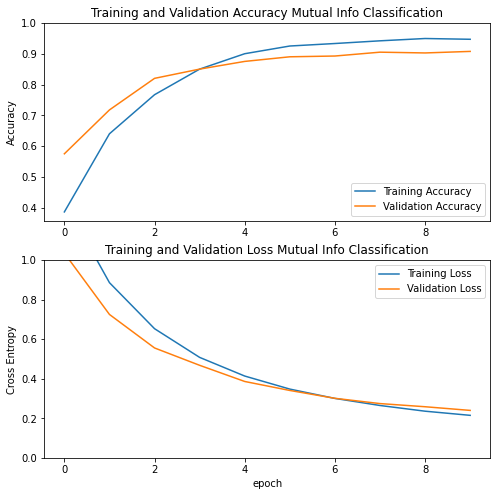

In [101]:
#Using all features
acc = history_mutual.history['accuracy']
val_acc = history_mutual.history['val_accuracy']

loss = history_mutual.history['loss']
val_loss = history_mutual.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Mutual Info Classification')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss Mutual Info Classification')
plt.xlabel('epoch')
plt.show()